In [81]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

%matplotlib inline

In [82]:
# import the dataset
from tensorflow.keras.datasets import fashion_mnist

In [83]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


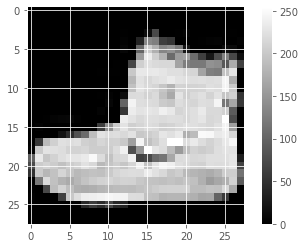

In [85]:
plt.style.use("ggplot")
plt.imshow(X_train[0],cmap="gray")
plt.colorbar()
plt.show()

In [86]:
np.max(X_train), np.min(X_train), np.mean(X_train)

(255, 0, 72.94035223214286)

In [87]:
class_names = []

In [88]:
X_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [89]:
# Normaxlizing the dataset
X_train = X_train/255.0
X_test = X_test/255.0

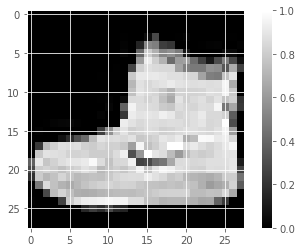

In [90]:
plt.imshow(X_train[0],cmap="gray")
plt.colorbar()
plt.show()

In [91]:
# Flatten The datasets
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [92]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [93]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [94]:
# Define an object
model = keras.Sequential([
    keras.layers.Dense(units=128,activation="relu",input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation="softmax")
])

In [95]:
# compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [97]:
epoch = 10
model.fit(X_train,y_train,epochs=epoch,verbose=2,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.5492 - sparse_categorical_accuracy: 0.8042 - val_loss: 0.4345 - val_sparse_categorical_accuracy: 0.8431
Epoch 2/10
60000/60000 - 2s - loss: 0.4184 - sparse_categorical_accuracy: 0.8489 - val_loss: 0.3933 - val_sparse_categorical_accuracy: 0.8572
Epoch 3/10
60000/60000 - 2s - loss: 0.3839 - sparse_categorical_accuracy: 0.8597 - val_loss: 0.3836 - val_sparse_categorical_accuracy: 0.8618
Epoch 4/10
60000/60000 - 2s - loss: 0.3627 - sparse_categorical_accuracy: 0.8671 - val_loss: 0.3623 - val_sparse_categorical_accuracy: 0.8678
Epoch 5/10
60000/60000 - 2s - loss: 0.3509 - sparse_categorical_accuracy: 0.8707 - val_loss: 0.3638 - val_sparse_categorical_accuracy: 0.8653
Epoch 6/10
60000/60000 - 2s - loss: 0.3374 - sparse_categorical_accuracy: 0.8757 - val_loss: 0.3513 - val_sparse_categorical_accuracy: 0.8712
Epoch 7/10
60000/60000 - 2s - loss: 0.3277 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.355

In [98]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3510 - sparse_categorical_accuracy: 0.8772


In [103]:
y_pred = model.predict_classes(X_test)

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [105]:
import seaborn as sns

<AxesSubplot:>

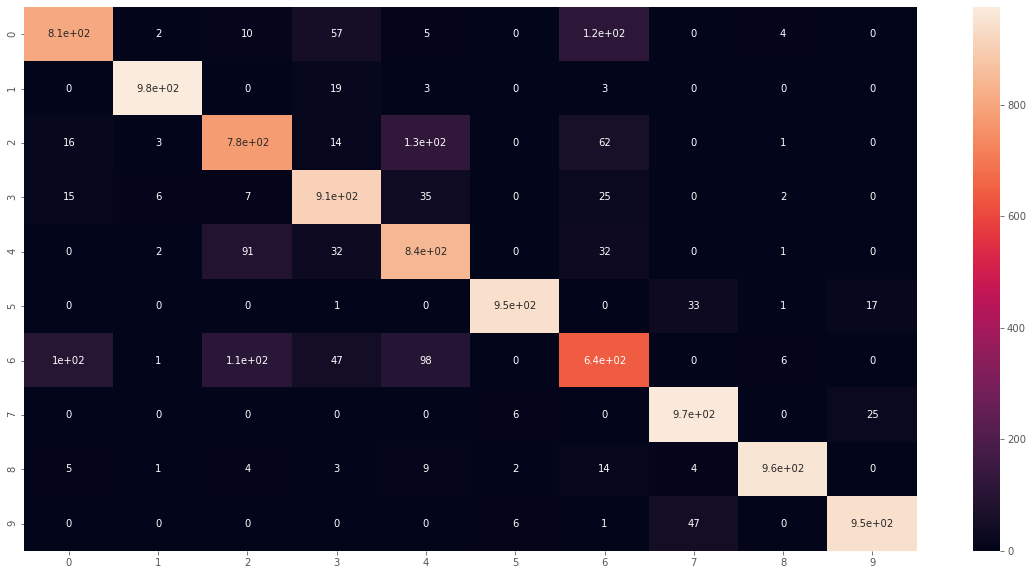

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test,y_pred)

0.8772